In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Define

In [0]:
#TRAIN_DATA_FILES = ['cross','dead_end', 'left', 'right', 'straight', 'threeway_left', 'threeway_center', 'threeway_right']
TRAIN_DATA_FILES = ['left']
# NUM_CLASSES = 6
NUM_CLASSES = len(TRAIN_DATA_FILES)
MAX_RANGE = 240

NUM_DATA = 400
REPLACE_NAN = 0.0

MARGIN = 1.5
RESOLUTION = 50.0 #(cm)
WIDTH = HEIGHT = int(400 * 2 * MARGIN / RESOLUTION)

## 学習データ数の読み込み用関数  
データ読み込み時、それぞれのラベルの学習データの内、最も数の少ないものに合わせる

In [0]:
def adjust_data_num(num_class):
    # header = 列名
    file_name = "/content/drive/My Drive/Colab Notebooks/data/" + TRAIN_DATA_FILES[num_class] + ".csv"
    data_set = pd.read_csv(file_name, header=None)

    return data_set.head(NUM_DATA)

## 学習データ読み込み用関数

In [0]:
def split_data():
#    files = os.listdir('/content/drive/My Drive/Colab Notebooks/data')
    X = []
    all_data_set = []

    for i in range(NUM_CLASSES):
        try:
            data_set = adjust_data_num(i)
            all_data_set.append(data_set)

        except pd.io.common.EmptyDataError:
            print("ERROR: {} is empty".format(file_name))

    X = pd.concat(all_data_set)
    # replace Nan with 'REPLACE_NAN'
    X = X.fillna(REPLACE_NAN)

#    _, DIM_input_data = data_set.shape

    return X.values

## Plot

In [0]:
X = split_data()
X *= 100 / RESOLUTION
_, DIM_input_data = X.shape

rotate = 0

matrix_x = [ [-np.sin(rotate + np.deg2rad((-MAX_RANGE/2) + (i / DIM_input_data * MAX_RANGE))) for i in range(DIM_input_data)]  ]
matrix_y = [ [np.cos(rotate + np.deg2rad((-MAX_RANGE/2) + (j / DIM_input_data * MAX_RANGE))) for j in range(DIM_input_data)]  ]

point_cloud_x = np.round(X * matrix_x) + (WIDTH / 2)
point_cloud_y = np.round(X * matrix_y) + (HEIGHT / 2)



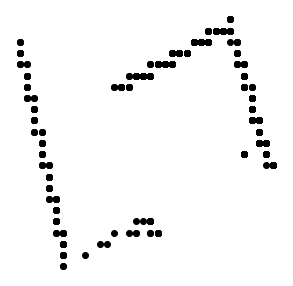

In [14]:
index = 119
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(point_cloud_x[index], point_cloud_y[index], color="k")
#ax.set_xlim(0, 30)
#ax.set_ylim(0, 30)

plt.axis("off")
#plt.savefig("result.png", transparent = True)
plt.show()

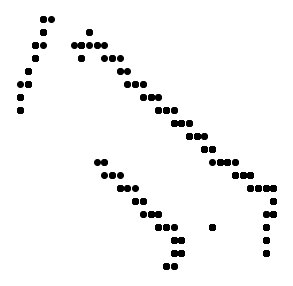

In [15]:
index = 8
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(point_cloud_x[index], point_cloud_y[index], color="k")
#ax.set_xlim(0, 30)
#ax.set_ylim(0, 30)

plt.axis("off")
#plt.savefig("result.png", transparent = True)
plt.show()

In [0]:
#TRAIN_DATA_FILES = ['cross','dead_end', 'left', 'right', 'straight', 'threeway_left', 'threeway_center], 'threeway_right
TRAIN_DATA_FILES = ['straight']
# NUM_CLASSES = 6
NUM_CLASSES = len(TRAIN_DATA_FILES)
MAX_ANGLE = 240
MAX_RANGE = 4
MAX_SPEED = 1.0
MAP_BUILD_HZ = 1.0

NUM_DATA = 400
REPLACE_NAN = 0.0


MARGIN = 1.5
RESOLUTION = 50.0 #(cm)
WIDTH = HEIGHT = int((2/RESOLUTION * (MAX_RANGE + MAX_SPEED/MAP_BUILD_HZ)*100)*MARGIN)


In [0]:
X = split_data()
X *= 100 / RESOLUTION
_, DIM_input_data = X.shape

rotate = 0

matrix_x = [ [-np.sin(rotate + np.deg2rad((-MAX_ANGLE/2) + (i / DIM_input_data * MAX_ANGLE))) for i in range(DIM_input_data)]  ]
matrix_y = [ [np.cos(rotate + np.deg2rad((-MAX_ANGLE/2) + (j / DIM_input_data * MAX_ANGLE))) for j in range(DIM_input_data)]  ]

point_cloud_x = np.round(X * matrix_x) + (WIDTH / 2)
point_cloud_y = np.round(X * matrix_y) + (HEIGHT / 2)



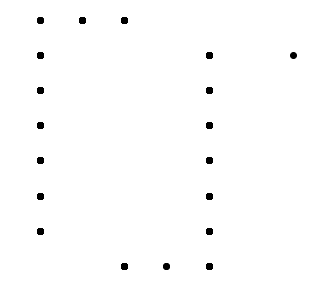

In [0]:
index = 8
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(point_cloud_x[index], point_cloud_y[index], color="k")
#ax.set_xlim(0, 30)
#ax.set_ylim(0, 30)

plt.axis("off")
#plt.savefig("result.png", transparent = True)
plt.show()